In [1]:
from sklearn.model_selection import train_test_split
import pandas as pn
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
from sklearn import metrics

from xgboost import XGBClassifier #定義XGBoost
import xgboost as xgb #定義XGBoost
import math #MSE公式會用到

from sklearn.ensemble import RandomForestClassifier
import pydotplus

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pwd

'C:\\Users\\user\\Documents\\GitHub\\hw2_M11023009'

In [3]:
Dry_Bean_Dataset = pn.read_csv('Dry_Bean_Dataset.csv', skiprows = 1, header=None,  names=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","Class"])

In [4]:
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# #資料量化

In [5]:
def dataCleaning(dataSet):
    #量化_換成number 0 1 2 3 (量化)
    
    occupation = list(set(dataSet['Class']))
    for i in range(len(occupation)):
        row = dataSet['Class'] == occupation[i]
        dataSet.loc[row,'Class'] = i+1
    dataSet['Class'] = dataSet['Class'].astype(np.int64)
        
   
      
    return dataSet

In [6]:
Dry_Bean_Dataset = dataCleaning(Dry_Bean_Dataset)
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,7
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,7
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,7
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,7


In [7]:
Dry_Bean_Dataset = Dry_Bean_Dataset.sample(frac=1)
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
329,35313,691.229,233.156695,193.117146,1.207333,0.560326,35743,212.042232,0.773899,0.987970,0.928754,0.909441,0.006603,0.002786,0.827083,0.998564,3
9481,48238,823.670,301.320125,204.601578,1.472717,0.734122,48845,247.827620,0.702737,0.987573,0.893496,0.822473,0.006247,0.001763,0.676462,0.996236,6
8580,43831,776.152,282.896878,198.606007,1.424413,0.712134,44357,236.235820,0.710021,0.988142,0.914319,0.835060,0.006454,0.001936,0.697325,0.993278,6
7590,37816,725.046,267.081646,180.625581,1.478648,0.736632,38249,219.428409,0.787046,0.988679,0.903971,0.821578,0.007063,0.001985,0.674990,0.998073,6
5431,93156,1183.213,482.049644,249.138961,1.934863,0.856086,94313,344.397885,0.800915,0.987732,0.836170,0.714445,0.005175,0.000832,0.510431,0.987615,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9428,47928,838.842,306.299514,200.856161,1.524969,0.754977,48754,247.030008,0.795063,0.983058,0.855931,0.806498,0.006391,0.001668,0.650439,0.991900,6
10646,27262,667.055,234.968561,149.093208,1.575984,0.772903,28168,186.309035,0.738088,0.967836,0.769918,0.792910,0.008619,0.002101,0.628707,0.990832,7
4032,64429,952.229,358.257363,229.943976,1.558020,0.766838,65054,286.414997,0.731782,0.990393,0.892912,0.799467,0.005560,0.001401,0.639148,0.995805,5
2450,65231,1026.265,363.466548,229.786481,1.581758,0.774799,66343,288.192104,0.824957,0.983239,0.778296,0.792899,0.005572,0.001359,0.628688,0.994432,2


# #拆分訓練集與測試集

In [8]:
#載入KNN分類法的距離

scaler = StandardScaler()
scaler.fit(Dry_Bean_Dataset.drop('Class',axis=1))
scaled_features = scaler.transform(Dry_Bean_Dataset.drop('Class',axis=1))
randombean_x_train_feat = pn.DataFrame(scaled_features,columns=Dry_Bean_Dataset.columns[:-1])
randombean_x_train_feat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.604825,-0.765601,-1.015102,-0.203555,-1.523939,-2.071434,-0.605404,-0.693232,0.492333,0.177423,0.932024,1.775645,0.034545,1.795939,1.853600,0.801807
1,-0.164045,-0.147532,-0.219647,0.051833,-0.448071,-0.182315,-0.165353,-0.088494,-0.957438,0.092290,0.339635,0.366370,-0.281109,0.079324,0.332059,0.268610
2,-0.314336,-0.369287,-0.434643,-0.081495,-0.643896,-0.421325,-0.316090,-0.284384,-0.809054,0.214331,0.689493,0.570337,-0.096939,0.369243,0.542816,-0.408807
3,-0.519465,-0.607786,-0.619204,-0.481341,-0.424025,-0.155032,-0.521236,-0.568413,0.760188,0.329728,0.515625,0.351870,0.442441,0.451411,0.317198,0.689353
4,1.367789,1.530366,1.889437,1.042248,1.425473,1.143407,1.361760,1.543452,1.042731,0.126495,-0.623535,-1.384171,-1.231394,-1.484103,-1.345139,-1.705939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.174617,-0.076728,-0.161538,-0.031457,-0.236237,0.044375,-0.168410,-0.101972,0.923517,-0.876580,-0.291521,0.107509,-0.153182,-0.080762,0.069189,-0.724447
13607,-0.879387,-0.878415,-0.993958,-1.182552,-0.029423,0.239223,-0.859822,-1.128099,-0.237249,-4.142948,-1.736696,-0.112673,1.822140,0.647052,-0.150346,-0.968985
13608,0.388115,0.452421,0.444801,0.615393,-0.102249,0.173302,0.379051,0.563596,-0.365715,0.697341,0.329813,-0.006425,-0.889316,-0.528252,-0.044877,0.169890
13609,0.415466,0.797928,0.505592,0.611891,-0.006017,0.259828,0.422344,0.593628,1.532543,-0.837778,-1.595924,-0.112866,-0.879127,-0.599887,-0.150537,-0.144512


In [9]:
#設定答案
Dry_Bean_Dataset_target = Dry_Bean_Dataset.pop('Class')

In [10]:
x_train,x_test,y_train,y_test = train_test_split(Dry_Bean_Dataset,Dry_Bean_Dataset_target,test_size=0.2)

In [11]:
y_train

10736    7
10744    7
1114     3
10716    7
1942     3
        ..
7766     6
11652    7
2683     2
11302    7
4375     5
Name: Class, Length: 10888, dtype: int64

# #SVR

In [12]:
clf = SVR().fit(x_train, y_train)

In [13]:
y_predict = clf.predict(x_test)

In [14]:
print("準確率：", clf.score(x_test, y_test))

準確率： 0.3131051897241707


In [15]:
def MAPE(y_test,y_Predicted):
    mape = np.mean(np.abs((y_test - y_Predicted)/y_test))*100
    return mape

In [16]:
print("RMSE:",np.sqrt(MSE(y_test,y_predict)))
print("MAE:",MAE(y_test,y_predict))
print("MAPE:",MAPE(y_test,y_predict),"%")

RMSE: 1.530620390847102
MAE: 1.08724566324969
MAPE: 35.08071014586528 %


Text(0, 0.5, 'Class')

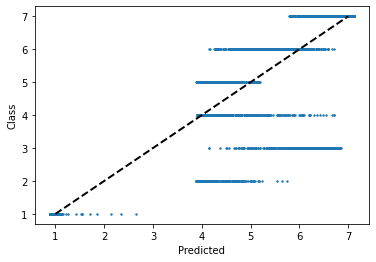

In [17]:
plt.scatter(y_predict,y_test,s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Class')

# # XGBOOST

In [18]:
# 建立 XGBClassifier 模型  #決策樹的個數#預測值為100 #學習速率0.2 #測試0.1~1 ,0.2的測試集最高
xgboostModel = XGBClassifier(n_estimators=100,learning_rate= 0.2)
# 使用訓練資料訓練模型
xgboostModel.fit(x_train, y_train)
# 使用訓練資料預測分類
pre = xgboostModel.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
#確認訓練集測試集的資料準確率
print('訓練集',xgboostModel.score(x_train, y_train))
print('測試集',xgboostModel.score(x_test, y_test))


訓練集 0.9974283614988979
測試集 0.9309585016525891


# #RMSE


In [20]:
print("RMSE:",np.sqrt(MSE(y_test,pre)))
print("MAE:",MAE(y_test,pre))
print("MAPE:",MAPE(y_test,pre),"%")

RMSE: 0.5665417185988721
MAE: 0.1278002203452075
MAPE: 3.5295454942902587 %


## 隨機森林

# 利用隨機森林分類器並決定決策數的棵樹、剪枝葉

In [21]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=50)

# 用建好的模型來預測資料

In [22]:
y_predict = rfc.predict(x_test)
y_predict

array([1, 5, 1, ..., 7, 6, 6], dtype=int64)

# 檢驗模型正確率

In [23]:
rfc.score(x_test,y_test) #準確率

0.922879177377892

In [24]:
#RMSE、MAE、MAPE績效

In [25]:
print("RMSE:",np.sqrt(MSE(y_test,y_predict)))
print("MAE:",MAE(y_test,y_predict))
print("MAPE:",MAPE(y_test,y_predict),"%")

RMSE: 0.6450466650924542
MAE: 0.15607785530664708
MAPE: 4.409614745641186 %


## KNN

In [26]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = randombean_x_train_feat
y = Dry_Bean_Dataset_target
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
#利用迴圈，選擇k值
from sklearn.neighbors import KNeighborsClassifier
mae = []
rmse = []
mape = []


for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred= knn.predict(x_test)


  mae.append(metrics.mean_absolute_error(y_test,pred))

  mse = metrics.mean_squared_error(y_test,pred) 
  rmse.append(np.sqrt(mse))



  mape.append(np.mean(np.abs((y_test - pred)/y_test))*100)





Text(0, 0.5, 'MAE')

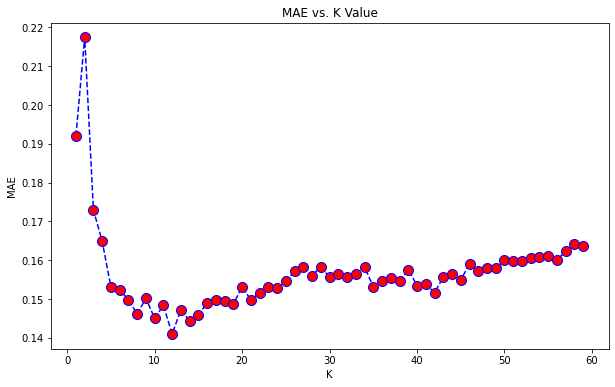

In [28]:
#將k=1~60的MAE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),mae,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('MAE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

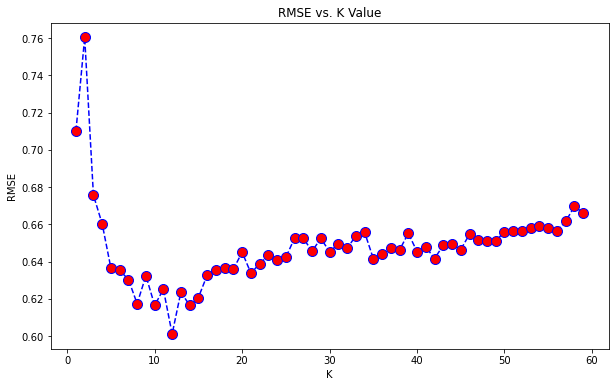

In [29]:
#將k=1~60的RMSE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),rmse,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAPE(%)')

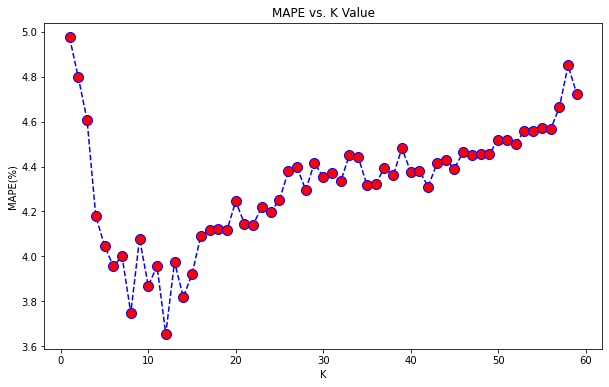

In [30]:
#將k=1~60的MAPE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),mape,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('MAPE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAPE(%)')